In [6]:
# on iris

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print(X[y==0,2])
print(X[y==0,2].shape)

print(y.shape)

for i,x in enumerate(X):
    print(X[i], ">>" , y[i])
    


[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
(50,)
(150,)
[5.1 3.5 1.4 0.2] >> 0
[4.9 3.  1.4 0.2] >> 0
[4.7 3.2 1.3 0.2] >> 0
[4.6 3.1 1.5 0.2] >> 0
[5.  3.6 1.4 0.2] >> 0
[5.4 3.9 1.7 0.4] >> 0
[4.6 3.4 1.4 0.3] >> 0
[5.  3.4 1.5 0.2] >> 0
[4.4 2.9 1.4 0.2] >> 0
[4.9 3.1 1.5 0.1] >> 0
[5.4 3.7 1.5 0.2] >> 0
[4.8 3.4 1.6 0.2] >> 0
[4.8 3.  1.4 0.1] >> 0
[4.3 3.  1.1 0.1] >> 0
[5.8 4.  1.2 0.2] >> 0
[5.7 4.4 1.5 0.4] >> 0
[5.4 3.9 1.3 0.4] >> 0
[5.1 3.5 1.4 0.3] >> 0
[5.7 3.8 1.7 0.3] >> 0
[5.1 3.8 1.5 0.3] >> 0
[5.4 3.4 1.7 0.2] >> 0
[5.1 3.7 1.5 0.4] >> 0
[4.6 3.6 1.  0.2] >> 0
[5.1 3.3 1.7 0.5] >> 0
[4.8 3.4 1.9 0.2] >> 0
[5.  3.  1.6 0.2] >> 0
[5.  3.4 1.6 0.4] >> 0
[5.2 3.5 1.5 0.2] >> 0
[5.2 3.4 1.4 0.2] >> 0
[4.7 3.2 1.6 0.2] >> 0
[4.8 3.1 1.6 0.2] >> 0
[5.4 3.4 1.5 0.4] >> 0
[5.2 4.1 1.5 0.1] >> 0
[5.5 4.2 1.4 0.2] >> 0
[

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0,2], X[y==0,3], "yo", label = "Iris-Setosa")
# taking in petal lenght and petal width when y=0 that is iris setosa
plt.plot(X[y==1,2], X[y==1,3],"bs", label = "Iris-Versicolor")
plt.plot(X[y==2,0], X[y==2,3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

# results of classificaiton vs results of clustering

<Figure size 900x350 with 2 Axes>

In [9]:
# using a gaussian mizture model to seperate these clusters 
# it also seems to be a non supervised model

from sklearn.mixture import GaussianMixture

In [10]:
import numpy as np

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

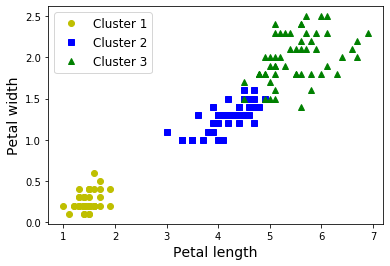

In [11]:
plt.plot(X[y_pred==0,2], X[y_pred==0,3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1,2], X[y_pred==1,3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2,2], X[y_pred==2,3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [12]:
np.sum(y_pred==y)

145

In [13]:
np.sum(y_pred==y)/ len(y_pred)

0.9666666666666667

### K Means

In [14]:
from sklearn.datasets import make_blobs

In [15]:
blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]]
)

blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [16]:
X,y = make_blobs(n_samples=2000, centers=blob_centers,
               cluster_std= blob_std, random_state=7)

In [17]:
## plotting blobs

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1],c=y, s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


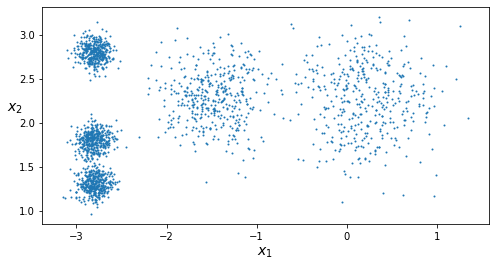

In [18]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

### fit and predict

In [19]:
from sklearn.cluster import KMeans

In [20]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [21]:
y_pred.max() # there are total of five clusters

4

In [22]:
y_pred is kmeans.labels_

True

In [23]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [24]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [25]:
# predicting labels of new instances
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Decision boundaries

In [29]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights> weights.max() /10]
    plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10,alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=50, linewidths=50,
                color=cross_color,zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # decision boundaries through contour
    plt.contourf(Z, extent=(mins[0],maxs[0], mins[1],maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("$x_1$",fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        

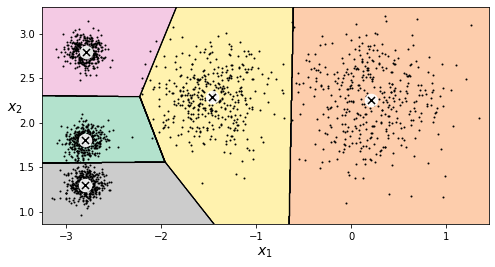

In [27]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

# its called a voronoi diagram

### Hard vs Soft clustering

In [28]:
# Rather than arbitarily choosing the closest cluster for each instance , 
# which is called _hard clustering_, it might be better mwasure the distance ofeach instance to all 5 centroids
# this is what the transform() method does

kmeans.transform(X_new)

# this is the euclidian distnace between each instance and each centroid

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [29]:
# explicitly calculating euclidean distance
np.linalg.norm(np.tile(X_new, (1,k)).reshape(-1,k,2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### K means algorithm

In [30]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=1)

kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=1)

kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

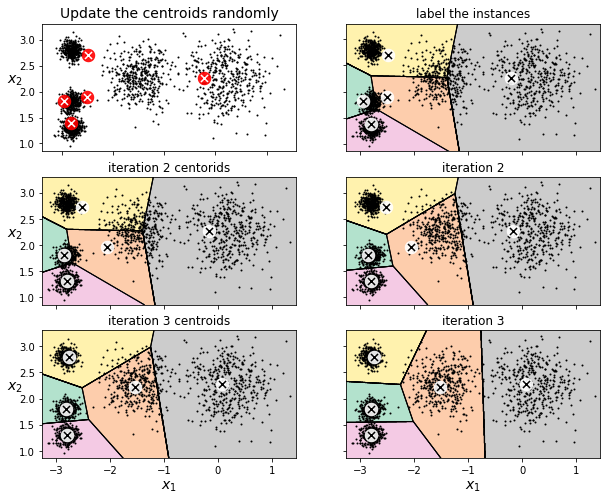

In [31]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids randomly", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X, show_xlabels=False, show_ylabels=False)
plt.title("label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("iteration 2 centorids")

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False )
plt.title("iteration 2")

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("iteration 3 centroids")

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X,show_ylabels=False)
plt.title("iteration 3")

plt.show()

### K means variability

In [32]:
# the problem with originial k means is that there is a lot of variability intrdcued

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10,3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1,X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X,show_ylabels=False)
    
    if title2:
        plt.title(title2, fontsize=14)

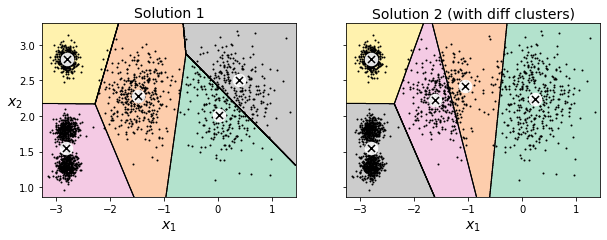

In [33]:
kmeans_end_init1 = KMeans(n_clusters=5,init="random",n_init=1,
                          algorithm="full", random_state=11)
kmeans_end_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_end_init1, kmeans_end_init2, X, "Solution 1", "Solution 2 (with diff clusters)")

plt.show()

### inertia

In [34]:
# to select the best model we need to evaluate tht emodel perofrmance
# inunsepervised model we don't have targets
# bu twe can measuer the distance between each instance and its centroid

kmeans.inertia_

211.5985372581684

In [35]:
# insertia is the sum of squared distances between each training instance and 
# the closest centroid

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [36]:
kmeans.score(X)
# gives a measure of inertia

-211.59853725816856

### Multiple inititalisations 

In [37]:
# wecan run Kmeans multiple times and calculate inertia
# th eone with least inertia is the solution

kmeans_end_init1.inertia_

223.29108572819035

In [38]:
kmeans_end_init2.inertia_

237.46249169442845

In [39]:
# when we set n_init hyperparameter, scikit-Learn runs the original algorithm
# It will run n_init times. default is 10

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random",n_init=10,
                             algorithm="full",random_state=11)

kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

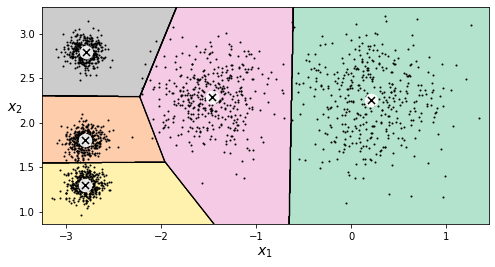

In [40]:
# the optimum value os k =5
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K means ++

In [41]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Accelerated K means

In [43]:
#K means can be accelerated by voiding uneccessary distance calculation
# by taking care of triangle property and lower and upper bounds of distances and centroids
# we just need to set the algorithm="elkan"

%timeit -n 50 KMeans(algorithm="elkan").fit(X)


63.1 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [44]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

67 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini batch K means

In [45]:
from sklearn.cluster import MiniBatchKMeans

In [46]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [47]:
minibatch_kmeans.inertia_

211.93186531476775

In [48]:
# we use memmap class ifdata does not fit in memory

filename= "my_mnist.data"
m,n = 50000, 28*28
X_mm = np.memmap(filename,dtype="float32", mode="readonly", shape=(m,n))


In [49]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [50]:
# if we can'tuse memap then things are vey complicated

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [51]:
# now we can train the model by feeding it one batch at atime
np.random.seed(42)

In [52]:
k =5
n_init = 10
n_iterations =100
batch_size = 100
init_size = 500 # more data for K++ initialisation
evaluate_on_last_n_iters =10

best_kmeans =None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
    
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [53]:
best_kmeans.score(X)

-211.70999744411483

In [54]:
# mini bathc kmeans is much faster thean regular K means

%timeit KMeans(n_clusters=5).fit(X)

29.3 ms ± 759 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

15.9 ms ± 543 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
# Thats faster but performance is often lower
# higher inertia
# and it keeps degrading as k increases
# lets plot the inertia ratio and the training time ratio between mini batch and regular K means

from timeit import timeit

times = np.empty((100,2))
inertias = np.empty((100,2))
for k in range(1,101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100),end="")
    times[k-1,0] = timeit("kmeans.fit(X)", number=10, globals=globals())
    times[k-1,1] = timeit("minibatch_kmeans.fit(X)",number=10, globals=globals())
    inertias[k-1,0] = kmeans.inertia_
    inertias[k-1,1] = minibatch_kmeans.inertia_

100/100

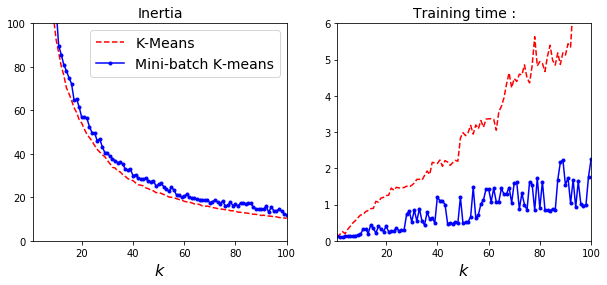

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(range(1,101), inertias[:,0], "r--", label="K-Means")
plt.plot(range(1,101), inertias[:,1], "b.-", label="Mini-batch K-means")

plt.xlabel("$k$",fontsize=16)

plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1,100,0,100])

plt.subplot(122)
plt.plot(range(1,101), times[:,0],"r--", label="K-Means")
plt.plot(range(1, 101), times[:,1], "b.-", label="Mini-batch K-means")
plt.xlabel("$k$",fontsize=16)

plt.title("Training time :", fontsize=14)
plt.axis([1,100,0,6])

plt.show()

### Finding optimal number of clusters

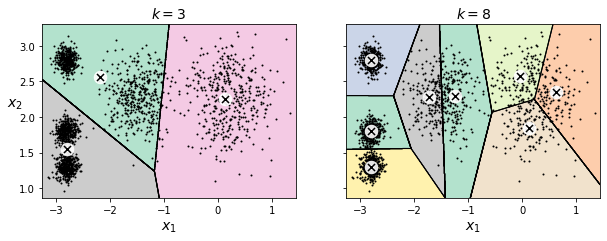

In [59]:
kmeans_k3 = KMeans(n_clusters =3,random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8,X, "$k=3$", "$k=8$")
plt.show()

# bad clusters

In [62]:
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

#inertia increases as we increase the value of k

653.2167190021553
119.11983416102879


In [63]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

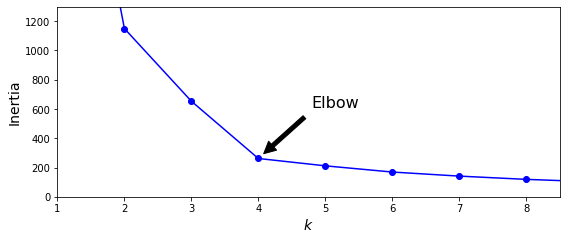

In [64]:
# inertia as a finction of k

plt.figure(figsize=(9,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy = (4, inertias[3]),
             xytext = (0.55,0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

# elbow at 4 indicates that less clusters would be bad and more clusters 
# woulf no help much

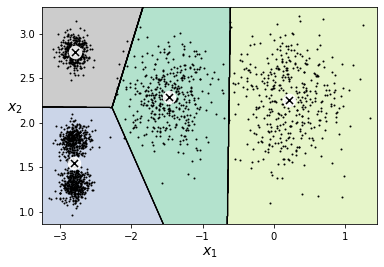

In [66]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [67]:
# another way to evaluate k means is by looking at silhouettecoefficient
# mean_sillhouette coefficient equal to (b-a)/max(a,b)
# where a is the mean distance to other instance in same cluster and
# b is the mean distance to instance of other clusters
# it can vary between -1 and +1
# +1 means it well within its own cluster
# -1 means it is assigned to wrong cluster

from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.34507909442492657

In [68]:
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]

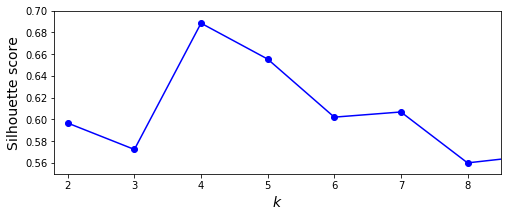

In [69]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55,0.7])
plt.show()

# it underlines the fact that k =4 and k =5 are both goos choices
# we can also plot every instance's silhouette coefficient
# given as silhouettet diagram

In [73]:
import matplotlib as mpl

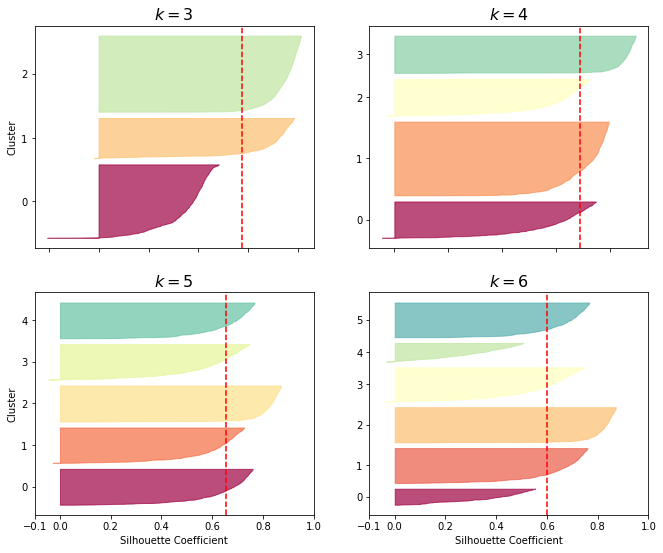

In [77]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Limits of K-means

In [79]:
X1, y1 = make_blobs(n_samples=1000,centers=((4,-4),(0,0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2,y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

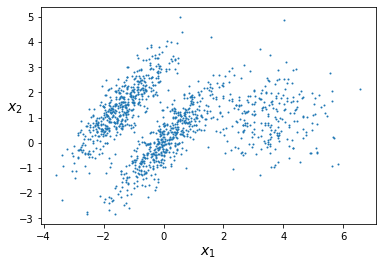

In [80]:
plot_clusters(X)

In [82]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5,2.5],[0.5,0], [4,0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

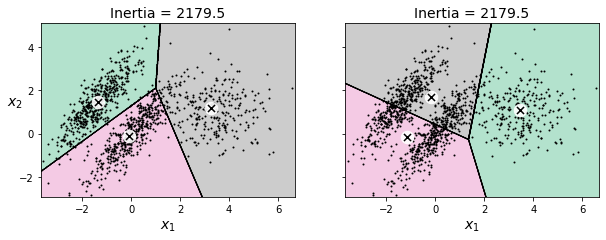

In [84]:
plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Using clustering for image segmentation

In [86]:
from matplotlib.image import imread
import os
image = imread(os.path.join("input", "ladybug.png"))
image.shape

(533, 800, 3)

In [93]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
print(segmented_img)
segmented_img = segmented_img.reshape(image.shape)

[[0.02240384 0.11051449 0.00579273]
 [0.02240384 0.11051449 0.00579273]
 [0.02240384 0.11051449 0.00579273]
 ...
 [0.09915568 0.25297862 0.01673489]
 [0.02240384 0.11051449 0.00579273]
 [0.02240384 0.11051449 0.00579273]]


In [97]:
print(kmeans.cluster_centers_)
print(len(kmeans.labels_))

# so each of the 425400 instances is replaced by the centroid value of clusters

[[0.98326355 0.9351094  0.02573261]
 [0.02240384 0.11051449 0.00579273]
 [0.21762744 0.38532948 0.0572455 ]
 [0.7599995  0.20910062 0.04433527]
 [0.09915568 0.25297862 0.01673489]
 [0.6116277  0.6297308  0.38689855]
 [0.37087163 0.52249783 0.156312  ]
 [0.8831067  0.72412664 0.03478576]]
426400


In [89]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

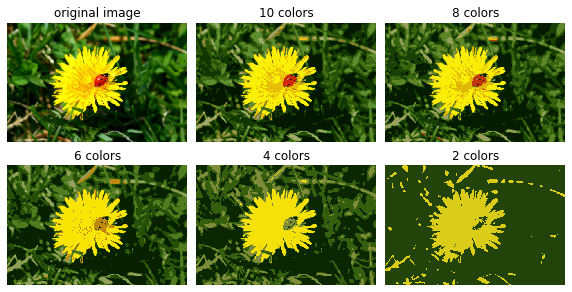

In [90]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis("off")

plt.show()

## Using clustering for preprocessing

In [98]:
# tackling digits dataset that is a simple MNIST like dataset 
# contains 1,797 grayscale 8 x 8 images representing 0 to 9 digits

from sklearn.datasets import load_digits

In [99]:
X_digits,y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits,random_state=42)


In [100]:
# logistic regression without preprocessing

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [102]:
# we will try and improve accuracy by using preprocessing by kmeans as a
# preprocessing step. We will create a pipeline that will first cluster the training set into 50
# clusters and replace the images with their distances to 50 clusters then apply
# logistic regression

from sklearn.pipeline import Pipeline

In [104]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50,random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [105]:
pipeline.score(X_test, y_test)

0.9822222222222222

In [106]:
1 - (1 - 0.9822222) / (1 - 0.96666)
#significant error rate reduction 

0.4667726454709078

In [107]:
# we can use grid serach to find the efficeint k parameter here

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3,verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.1s
[CV] 

[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.3s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.3s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.3s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.3s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.4s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=44 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=63 ...........................................
[CV] ............................ kmeans__n_clusters=63, total=   0.4s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.5s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.5s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   1.2s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
      

In [108]:
grid_clf.best_params_

{'kmeans__n_clusters': 90}

In [109]:
grid_clf.score(X_test, y_test)

0.9844444444444445

## Clustering for semi supervised learning



In [110]:
# looking at performance of logisic regression when we ahve 50 lalbelled
# isntances

n_labeled = 50

In [111]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [ ]:
# inorder to improve this score we will cluster the training set into 50 lcusters then
# for each cluster we find image closest to centroid
# then these will be the representative images

k =50

In [113]:
kmeans= KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis=0)
X_representative_digits = X_train[representative_digit_idx]

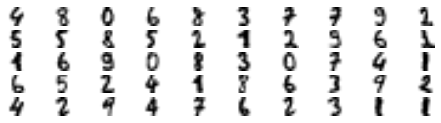

In [115]:
# plotting and labelling the images
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10,10,index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [116]:
# we will manually label these digits

y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1
])

In [118]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear",random_state=42)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test, y_test)

# since in supervised learning we label dataset manually 
# we should always label representative instances

0.9244444444444444

In [120]:
# but we can improve this by propogating the labels to all other instances in the
# same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [123]:
log_reg = LogisticRegression(multi_class="ovr",solver="liblinear", tol=0.0001, verbose=0,warm_start=False)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
log_reg.score(X_test, y_test)

# by propogating to full cluster we have also included some outliers

0.9288888888888889

In [126]:
# instead of propogating to entire dataset we will
# only go to closest 20 percentile

percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = X_cluster_dist > cutoff_distance
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [130]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [131]:
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
log_reg.score(X_test, y_test)


0.9422222222222222

In [133]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

# other things we can try
# 1. pick instances the classifier is least sure about by picking distinct clusters
# 2. train new models with additional labels

0.9896907216494846

### DBSCAN

In [1]:

from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
# eps indicates how close the instances must be
# to betaken as part of the same cluster
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [5]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [6]:
len(dbscan.core_sample_indices_)

808

In [7]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [9]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [11]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [12]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [22]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:,0], cores[:,1], c=dbscan.labels_[core_mask], marker='o',s=size,cmap="Paired")
    plt.scatter(cores[:,0],cores[:,1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:,0], anomalies[:,1],c="r", marker="x", s=100)
    plt.scatter(non_cores[:,0], non_cores[:,1], c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_parms(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
    

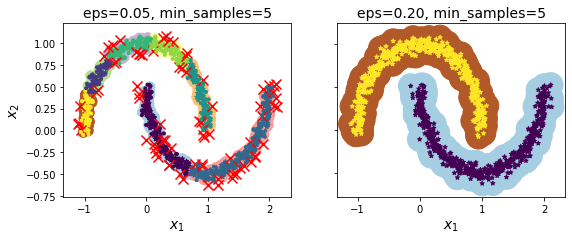

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [24]:
dbscan = dbscan2

from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [26]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [27]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

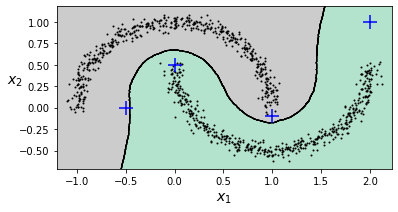

In [30]:
plt.figure(figsize=(6,3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:,0],X_new[:,1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [32]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Other clustering algorithms

### Spectral clustering

In [33]:
from sklearn.cluster import SpectralClustering

In [35]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=42)

In [36]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=42)

In [37]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [42]:
def plot_spectral_clustering(sc, X,size,alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:,0],X[:,1], marker='o', s=size,c='gray', cmap="Paired",alpha=alpha)
    plt.scatter(X[:,0], X[:,1], marker='o', s=30, c='w')
    plt.scatter(X[:,0], X[:,1], marker=".",s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF famma={}".format(sc.gamma),fontsize=14)

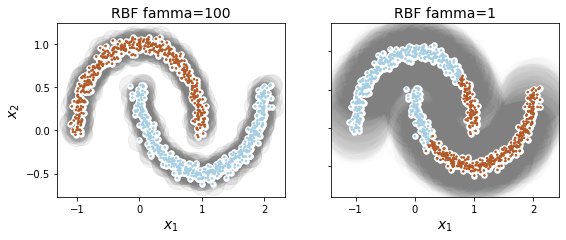

In [43]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_spectral_clustering(sc1,X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Agglomerative clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
X = np.array([0,2,5,8.5]).reshape(-1,1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [48]:
[m for m in dir(agg)
 if m.endswith("_") and not m.startswith("_")]

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [50]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## Gaussian Mixtures

In [53]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4,-4), (0,0)), random_state=(42))
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6,-8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [54]:
# training a gausssian mixture model
from sklearn.mixture import GaussianMixture

In [55]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [56]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [57]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [58]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [59]:
# did algorithm converge
gm.converged_

True

In [60]:
# how many iteration it took for convergences
gm.n_iter_

4

In [61]:
# prediciton function
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

In [63]:
# generative model so you can also create more X and y from the model

X_new, y_new = gm.sample(6)
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [65]:
y_new

array([0, 1, 2, 2, 2, 2])

In [66]:
# to estimate the probability density function using score_samples()

gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

In [67]:
resolution = 100
grid = np.arange(-10,10,1/ resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1/resolution) ** 2
pdf_probas.sum()

0.9999999999217849

In [68]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1],maxs[1],resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0,2,12))
    plt.contour(xx, yy, Z,
                norm = LogNorm(vmin=1.0, vmax=30.0),
                levels= np.logspace(0,2,12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidth=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.xlabel("$x_1$",fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'


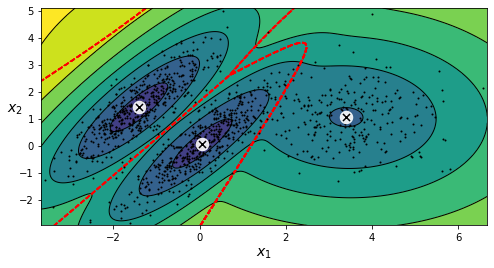

In [69]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm, X)

plt.show()

In [70]:
# variance constrainst can be placed on the system
# by changinf the covariance type hyperparameter
# full : default no constraint
# tied :  all ellipsoid must tbe of sameshape
# spherical: spherical cluster
# diag : the ellipsoid axes must be parallel to axis

gm_full = GaussianMixture(n_components=3, n_init=10,covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,covariance_type="tied" , random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,covariance_type="diag",random_state=42)

gm_array = [gm_full, gm_tied, gm_spherical, gm_diag]

for g in gm_array:
    g.fit(X)

In [71]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9,4))
    plt.subplot(121)
    plot_gaussian_mixture(gm1,X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)
    
    plt.subplot(122)
    plot_gaussian_mixture(gm2,X, show_ylabels=False)
    plt.title('covariance_type="{}""'. format(gm2.covariance_type), fontsize=14)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'


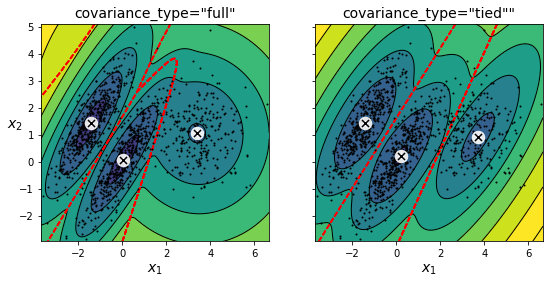

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'
C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'


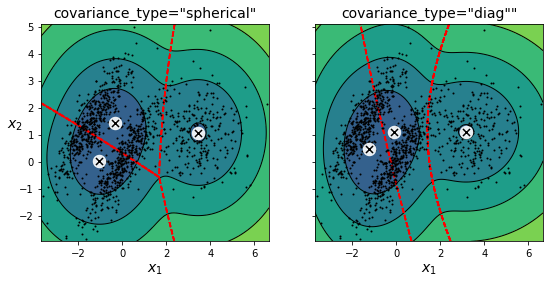

In [72]:
for i in [0,2]:
    compare_gaussian_mixtures(gm_array[i],gm_array[i+1],X)
    
    plt.show()

### Anomaly detection using gaussian mixtures

In [73]:
# these can be used for anomaly detection, instances located at low-density regions can be considered as anomalies
# we can set density thresholds inorderto isolate the samples

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'linewidth'


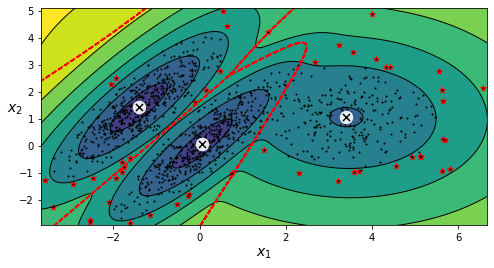

In [74]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:,0], anomalies[:,1],color='r',marker='*')
plt.ylim(top=5.1)

plt.show()

### Model selection

In [75]:
# we cannot set inertia or silhouette scorebecause they both assume that clusters
# are spherical instead we try to find the model that minimize a theoretical
# infromation criterion
# such as Bayesian Information Criterion (BIC)
# Akaike Information Criterion (AIC)

gm.bic(X)

8189.74345832983

In [76]:
gm.aic(X)

8102.518178214792

In [79]:
n_clusters =3
n_dims =2

n_params_for_weights = n_clusters -1
# since the sum must be equal to 1 we have one degree of freedom less
# that is why -1

n_params_for_means = n_clusters * n_dims

n_params_for_covariance = n_clusters * n_dims * (n_dims + 1)// 2
# degree of freedom for a covariance matrix is n(n +1)/2

n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance

max_log_likelihood = gm.score(X) * len(X)
# gm.score Compute the per-sample average log-likelihood of the given data X.

bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [80]:
bic, aic

(8189.74345832983, 8102.518178214792)

In [81]:
n_params

17

In [82]:
# gaussian model at various values of k to measure the BIC

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1,11)]


In [83]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

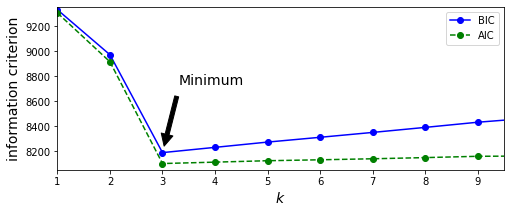

In [88]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11), bics, "bo-", label="BIC")
plt.plot(range(1,11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information criterion", fontsize=14)
plt.axis([1,9.5, np.min(aics)-50,np.max(aics)+50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35,0.6),
             textcoords='figure fraction',
             fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()
plt.show()


In [89]:
# serach for best combination of values for both the number
# of clusters and covariance type

min_bic = np.infty

for k in range(1,11):
    for covariance_type in ("full", "tied","spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type= covariance_type, random_state=42).fit(X).bic(X)
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type



In [90]:
best_k

3

In [92]:
best_covariance_type 

'full'